 Проверка статистических гипотез.
====================

* Проверка гипотезы о нормальности распределения.<br>
H0: $X \sim N(\cdot, \cdot)$<br>
H1: $X \nsim N(\cdot, \cdot)$<br>
Критерий Шапиро-Уилка [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.shapiro.html).<br>


* Критерий согласия Стьюдента.<br>
H0: $\mu = M$<br>
H1: $\mu \ne M$<br>
[scipy.stats.ttest_1samp](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html).<br>

Критерий позволяет найти вероятность того, что оба средних значения в выборке относятся к одной и той же совокупности


* Проверка гипотезы о равенстве средних значений.<br>
H0: $\mu_1 = \mu_2$<br>
H1: $\mu_1 \ne \mu_2$<br>
Распределение выборок должно быть близко к нормальному.<br>
  * Для несвязных выборок: [scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_ind.html).<br>
  * Для связных выборок: [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html).<br>
  

* Проверка гипотезы о равенстве медиан.<br>
  * Для несвязных выборок: критерий Манна-Уитни [scipy.stats.mannwhitneyu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html).<br>
  * Для связных выборок: критерий Уилкоксона [scipy.stats.wilcoxon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html).<br>
  * Критерий Муда [scipy.stats.median_test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html).<br>


* Проверка гипотезы о равенстве дисперсий.<br>
H0: $\sigma_1 = \sigma_2$<br>
H1: $\sigma_1 \neq \sigma_2$<br>
Критерий Флингера-Килина [scipy.stats.fligner](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.fligner.html).<br>


* Проверка гипотезы о равенстве долей категориального признака.<br>
H0: $p_1 = p_2$<br>
H1: $p_1 \ne p_2$<br>
Критерий хи-квадрат [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.chi2_contingency.html).<br>


* Проверка гипотезы о независимости (корреляция).<br>
H0: X и Y независимы<br>
H1: X и Y зависимы<br>
  * Для непрерыных величин: корреляция Пирсона [scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html),<br>
  * Для дискретных величин: корреляция Спирмэна [scipy.stats.kendalltau](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kendalltau.html).<br>


Большинство из этих функций вовзращает два значения (бывает и больше). Но всегда первое из них -- значение статистики критерия, второе -- p-value. Нам будет интересно именно p-value.

Замечание. В реализациях критериев Стьюдента и Манна-Уитни-Уилкоксона нет возможности задать одностороннюю альтернативную гипотезу. В этих случаях нулевую гипотезу нужно отвергать, если $\frac{\text{p-value}}{2} < \alpha$.

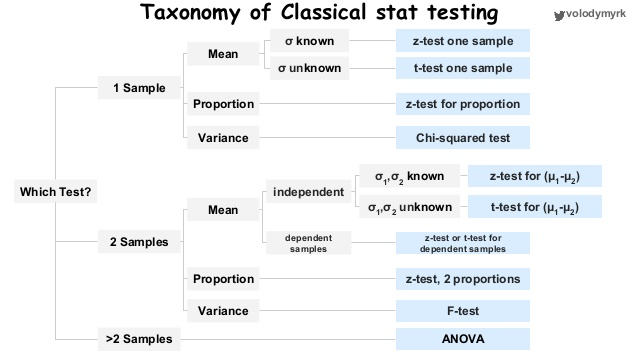

In [18]:
from IPython.display import Image
Image("stat_tests.jpg")

Пример 1. Проверка нормальности распределения
---------------------------------

In [38]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline

Рассмотрим датасет о населении в городах в 1959 году (в тыс. человек)

In [19]:
town_df = pd.read_csv('town_1959_2.csv', encoding='cp1251')
town_df = town_df.set_index('номер')

In [20]:
town_df.head()

,город,население
номер,,
1,Москва,5046.0
2,Санкт-Петербург,3003.0
3,Нижний_Новгород,941.0
4,Новосибирск,885.0
5,Самара,806.0


In [24]:
town_df.shape

(1004, 2)

In [21]:
town_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1004 entries, 1 to 1 004
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   город      1004 non-null   object 
 1   население  1004 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.5+ KB


In [77]:
town_df["население"].describe() # посмотрим на все статистики

count    1004.000000
mean       52.925199
std       204.885662
min         0.100000
25%        10.700000
50%        19.250000
75%        37.975000
max      5046.000000
Name: население, dtype: float64

видно, что максимальное значение очень большое и на несколько порядков 
отличается от медианного и среднего

<AxesSubplot:>

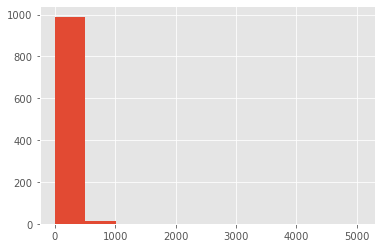

In [23]:
town_df["население"].hist() # плотность распределения

попробуем привести гистограмму к нормальному распределению с помощью логарифмирования

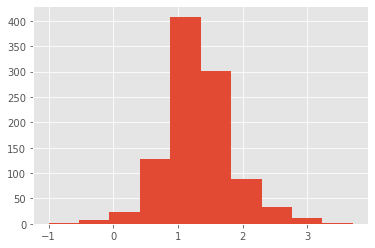

In [41]:
plt.hist(np.log10(town_df['население'])); 
# приведение к нормальному распределению 

In [40]:
res = stats.shapiro(np.log10(town_df['население']))
print('p-value: ', res[1])

p-value:  3.1486824866172602e-12


p-value получился маленьким (меньше $\alpha = 0.01, 0.05$). А почему получилось не нормальное распределение? Гистограмма же была колоколообразной. Станет понятнее, если увеличить число столбцов.

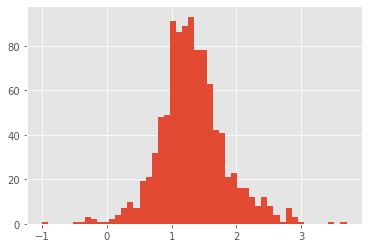

In [39]:
plt.hist(np.log10(town_df['население']), bins=50); # добавили больше точек

Распределение на гистограмме показывает, что в данных присуствуют выбросы (как минимум - Москва и Питер) по численности населения. Нам необходимо убрать их

In [26]:
len(town_df[town_df['население'] < 52.925199])/len(town_df)*100 # смотрим процент городов, 
# которые имеют численность меньше среднего

82.37051792828686

82 процента городов имеют население меньше среднего, то есть данное среднее не верно для данной выборки

Отрежем Москву и Питер

In [29]:
new_town = town_df.iloc[2:,:]

In [30]:
new_town.describe().T

,count,mean,std,min,25%,50%,75%,max
население,1002.0,44.997904,91.645867,0.1,10.7,19.15,37.55,941.0


Стоит заметить, что среднее (mean) превышает 3/4 часть всех наблюдений 75%. А это не правильно

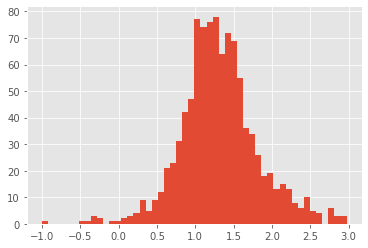

In [34]:
plt.hist(np.log10(new_town['население']), bins=50); # добавили больше точек

In [35]:
res = stats.shapiro(np.log10(new_town['население']))
print('p-value: ', res[1])

p-value:  6.913386529916465e-11


p-value стало еще меньше, после того, как мы убрали 2 больших города

Посмотрим на боксплоты

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='население'>

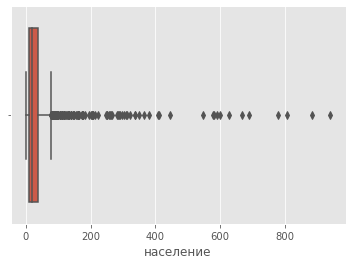

In [42]:
sns.boxplot(new_town["население"])

Мы можем обрезать по квантилю большие города и оставить те 80 процентов данных

In [137]:
import warnings
warnings.filterwarnings("ignore")

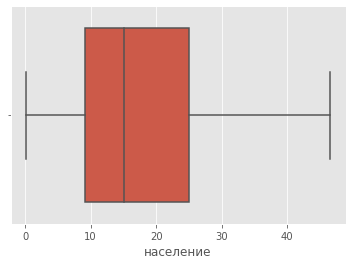

In [139]:
sns.boxplot(town_df[town_df["население"] < town_df["население"].quantile(.8)]["население"]);

Уже более менее, еще раз проверим тест, но сначала создадим новую переменную

In [59]:
df_new = town_df[town_df["население"] < town_df["население"].quantile(.8)]

In [60]:
res = stats.shapiro((df_new['население']))
print('p-value: ', res[1])

p-value:  2.147379134335585e-16


Но как видно, это все равно не помогло....

Переходим к следующему набору данных

Пример 2. Критерий Манна-Уитни. Дома в Альбукерке (на углу VS не на углу)
===============

In [80]:
df = pd.read_csv('Albuquerque Home Prices_data.txt', sep='\t') # загрузка данных

In [81]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13,7,1,1,0,1639
1,2080,2600,-9999,4,1,1,0,1088
2,2150,2664,6,5,1,1,0,1193
3,2150,2921,3,6,1,1,0,1635
4,1999,2580,4,4,1,1,0,1732


In [82]:
df.shape

(117, 8)

In [87]:
df.describe()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1062.735043,1653.854701,-4178.914530,3.529915,0.666667,0.230769,0.188034,-128.948718
std,380.436985,523.722802,4961.782238,1.405486,0.473432,0.423137,0.392420,3044.626782
min,540.000000,837.000000,-9999.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000
25%,780.000000,1280.000000,-9999.000000,3.000000,0.000000,0.000000,0.000000,553.000000
50%,960.000000,1549.000000,4.000000,4.000000,1.000000,0.000000,0.000000,701.000000
75%,1200.000000,1894.000000,15.000000,4.000000,1.000000,0.000000,0.000000,899.000000
max,2150.000000,3750.000000,53.000000,8.000000,1.000000,1.000000,1.000000,1765.000000


Хотим проверить, что цены домов на углу (```COR = 1```) отличаются от цен домов не на углу (```COR = 0```). Хотим попробовать применить критерий Стьюдента, но предварительно нужно:
1. Проверить нормальность данных,
2. Проверить равенство дисперсий.

Очевидно, что значение -9999 здесь употребляется в качестве пустого значения. Нужно заменить его на корректное пустое значение.

In [9]:
df = df.replace(-9999, np.nan)

In [10]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


Сохраним в отдельные переменные выборки, которые собираемся сравнивать.

In [99]:
x = df[df['COR'] == 1]['PRICE']
y = df[df['COR'] == 0]['PRICE']
x.name, y.name = 'corner', 'not corner' # на углу, не на углу

In [100]:
x

17     1110
18     1139
23      900
26     1695
30     1020
31     1020
33      925
44      725
49     1299
50     1250
63      835
65      805
67      750
78     1295
79      975
84      700
95      699
96     1330
104    1000
105    1030
115     766
116     739
Name: corner, dtype: int64

In [101]:
y

0      2050
1      2080
2      2150
3      2150
4      1999
       ... 
110     945
111     874
112     872
113     870
114     869
Name: not corner, Length: 95, dtype: int64

Проверяем нормальность распределений. 

In [102]:
# Функции определяются так.
def two_histograms(x, y):
# После определения функции полезно бывает добавить её описание в таком стиле.
# Тройные кавычки -- для обрамления многострочных строковых литералов.
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

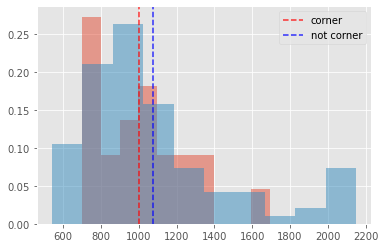

In [103]:
# вызываем функцию для определённых выше векторов x, y.
two_histograms(x, y)

В распределении есть очевидные выбросы, которые не дают применить критерий Стюдента. Можно было бы попробовать избавиться от них, но первой (красной) гистограмме это не поможет. Выброс у неё всего один, и его удаление не сделает данные более нормальными: слишком уж большой крайний левый столбик. Тогда можно поробовать применить непараметрические критерии. Критерий Уилкоксона применим только для парных выборок. У нас же в разных выборках находятся разные объекты (дома). Поэтому нам остаётся критерий Манна-Уитни.

In [104]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 0.40220407862126695


p-value получилось достаточно большим, поэтому у нас нет оснований отвергнуть гипотезу. Вывод: цены домов различаются незначимо -- разница медиан в выборках случайна.

Пример 3. Дома в Альбукерке (северо-восток VS остальные)
=========================

In [105]:
# df загружен в предыдущем примере
x = df[df['NE'] == 1]['PRICE']
y = df[df['NE'] == 0]['PRICE']
x.name, y.name = 'NE', 'not NE'

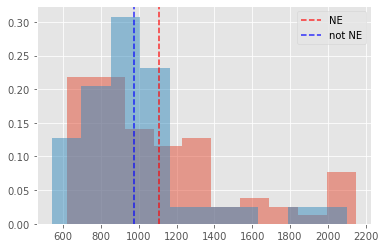

In [106]:
two_histograms(x, y)

In [111]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 0.052720404934078396


p-value 0.05 - можем принять нулевую гипотезу, и значит, что цены домов различаются незначимо 

# Пример 4. Критерий Стьюдента для независимых выборок. 

Возраст, в котором умирают европейские аристократы.
=====================

Данные о возрасте, в котором умирали европейцы в середине 19 века, в зависимости от их класса (sovereignty (верховная власть), aristocracy (аристократия, знать), and gentry (дворянство).

In [113]:
df = pd.read_csv('agedeath.dat.txt', sep='\s+', header=None, names=['group', 'age', 'index'])

In [114]:
df.head()

,group,age,index
0,aris,21,1
1,aris,21,2
2,aris,21,3
3,aris,21,4
4,aris,21,5


In [115]:
df.shape

(6186, 3)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6186 entries, 0 to 6185
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   group   6186 non-null   object
 1   age     6186 non-null   int64 
 2   index   6186 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 145.1+ KB


In [117]:
df.describe()

,age,index
count,6186.000000,6186.000000
mean,57.675558,1079.493372
std,17.503980,664.831939
min,21.000000,1.000000
25%,45.000000,516.000000
50%,60.000000,1031.500000
75%,71.000000,1600.000000
max,102.000000,2455.000000


<AxesSubplot:>

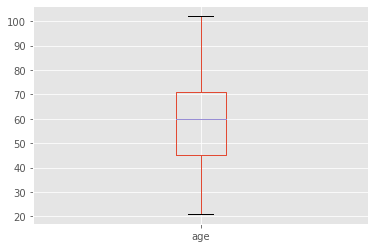

In [118]:
df.boxplot("age")

разделим данные на несколько групп по классу столбца group

In [119]:
x = df[df['group'] == 'sovr']['age']
y = df[df['group'] == 'aris']['age']
x.name, y.name = 'sovr', 'aris'

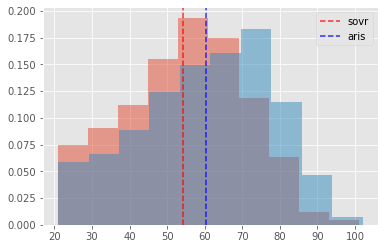

In [120]:
two_histograms(x, y)

Данные условно нормальны. Проверим c помощью критерия Флигнера-Килина, равны ли дисперсии.

In [121]:
res = stats.fligner(x, y)
print('p-value: ', res[1])

p-value:  0.00010116077103844913


Значение p-value низкое, поэтому гипотезу о равенстве дисперсий отвергаем. В двух выборках находятся разные наблюдаемые объекты, то есть выборки несвязные. Итого, гипотезу о равенстве средних значений будем проверять с помощью ```ttest_ind``` с опцией ```equal_var=False```.

In [124]:
res = stats.ttest_ind(x, y, equal_var=False)
print('p-value: ', res[1])

p-value:  1.5181184197728794e-26


p-value низкое, и значит отвергаем нулевую гипотезу о равенстве средних значений

# Пример 5. Критерий Стьюдента для парных выборок. 

Чтение названий цветов
=================

Исследование 1935 года, в котором изучалась скорость чтения названий цветов в зависимости от того, шрифт какого цвета использовался.

In [73]:
df = pd.read_csv('interference.csv') # diffcol - различные цвета, # black - черный цвет

In [74]:
df.head()

,Subj,DiffCol,Black
0,1,39.64,37.53
1,2,44.26,42.02
2,3,33.84,31.99
3,4,53.88,39.48
4,5,38.94,43.09


In [75]:
df.shape

(70, 3)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Subj     70 non-null     int64  
 1   DiffCol  70 non-null     float64
 2   Black    70 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.8 KB


In [24]:
x = df['DiffCol']
y = df['Black']
x.name, y.name = 'DiffCol', 'Black'

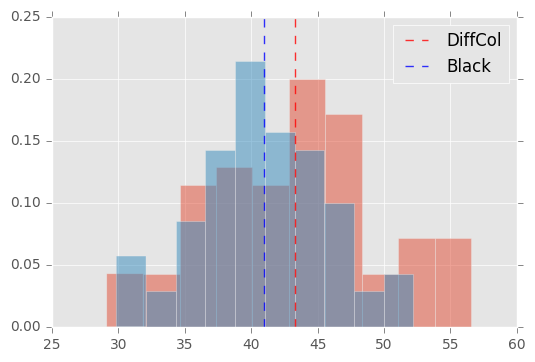

In [25]:
two_histograms(x, y)

Распределения условно нормальны.  Поскольку в наблюдениях содержатся одни и те же люди, которых просили прочитать различные шрифты, поэтому выборки у нас связные, а значит используем ```ttest_rel```.

In [26]:
res = stats.ttest_rel(x, y)
print('p-value: ', res[1])

p-value: 0.0162416779538


p-value получился довольно низким, но возможно не таким низким, как хотелось бы. На уровне значимости 0.05 гипотеза будет отвергнута, но на уровне 0.01 уже нет. Решение за исследователем. Всё зависит от того, насколько сильно мы боимся ошибки первого рода, насколько сильно мы должны ручаться за выводы.

Поэтому важно заранее установить значение p-value заранее. Альфа всегда должна быть установлена ​​перед экспериментом, чтобы избежать смещения. Если наблюдаемое р-значение ниже, чем альфа, то мы заключаем, что результат является статистически значимым.

Пример 6. Популярность кандидата.
=================
В регионе ожидаются выборы. Команда кандидата проводит опрос, в результате которого в поддержку кандидата высказалось 28% из 100 опрошенных в городе и 20% из 100 опрошенных на селе. Нужно выяснить, является ли эта разница статистически значимой, и нужно ли разворачивать дополнительную рекламную кампанию на селе.

Проверять будем критерием хи-квадрат. Сначала построим таблицу сопряжённости.

In [27]:
contingency_table = pd.DataFrame([[28, 72], [20, 80]],
                                 index=['city', 'country'],
                                 columns=['for', 'against'])
contingency_table

,for,against
city,28,72
country,20,80


In [28]:
res = stats.chi2_contingency(contingency_table)
print 'p-value: {0}'.format(res[1])

p-value: 0.246470120692


p-value получился достаточно большим, поэтому оснований отвергнуть гипотезу о равенстве долей нет. Результат статистически значимый, значит нужно делать дополнительную рекламную компанию на селе.

Пример 7. Корреляция цены и площади домов в Альбукерке.
--------------------

In [126]:
df = pd.read_csv('Albuquerque Home Prices_data.txt', sep='\t')
df = df.replace(-9999, np.nan)

In [127]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


Проверим очевидный факт, что площадь дома коррелирует с его ценой.

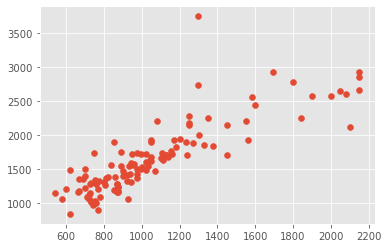

In [128]:
plt.scatter(df['PRICE'], df['SQFT'])

Рассчитаем коэффициент корреляции Пирсона для двух переменных

In [129]:
res = stats.pearsonr(df['PRICE'], df['SQFT'])
print('Pearson rho: ', res[0])
print('p-value: ', res[1])

Pearson rho:  0.8447950985552124
p-value:  5.146345707629025e-33


p-value очень низки, а коэффициент корреляции высокий (84), значит мы отвергаем нулевую гипотезу, о независимости выборок и принимаем альтернативную гипотезу о зависимости данных

In [135]:
df = df.replace(-9999, np.nan)
df.dropna(inplace = True)

res = stats.pearsonr(df['TAX'], df['SQFT'])
print('Pearson rho: ', res[0])
print('p-value: ', res[1])

Pearson rho:  0.8752495561607424
p-value:  7.315967238750351e-22
